<a href="https://colab.research.google.com/github/VishalnSingh/Machine_Learning_algorithms/blob/master/Movie_Genre_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# In the below dataset some of the **genre** Of the movie is missing. and, in this we're predicting the genre of the movie..
# It is similar to your problem statement where video tags/labels were missing !!

# It is **multi-label classification problem**, where we have to predict the genre of movie..another example of this problem is 
# to predict the category of the news i.e. it is either crime, entertainment, politics etc. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import nltk
import re
import csv
import seaborn as sns

from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Exploratory Data Analysis & Pre Processing

meta = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Totality Assignment/Assignment_2/movie.metadata.tsv", sep='\t', header=None)

In [0]:
meta.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [0]:
#Adding Headers to DataFrame

meta.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]

In [0]:
#Loading Movie Plots

plots = []

with open("/content/drive/My Drive/Colab Notebooks/Totality Assignment/Assignment_2/plot_summaries.txt", 'r') as f:
       reader = csv.reader(f, dialect='excel-tab') 
       for row in tqdm(reader):
            plots.append(row)

42303it [00:02, 18585.33it/s]


In [0]:
movie_id = []
plot = []

for i in tqdm(plots):
    movie_id.append(i[0])
    plot.append(i[1])
    
movies = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

100%|██████████| 42303/42303 [00:00<00:00, 976944.27it/s]


In [0]:
movies.head()

,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


**Merging the DataFrames** - Let’s add the movie names and their genres from the movie metadata file by merging the latter into the former based on the movie_id column

In [0]:
meta['movie_id'] = meta['movie_id'].astype(str)

In [0]:
movies = pd.merge(movies, meta[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

In [0]:
movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


**Extracting Genres** - Lets extract all the genres from the movies data. Once done, add the extracted genres as lists back to the movies dataframe

In [0]:
genres = []

for i in movies['genre']:
    genres.append(list(json.loads(i).values()))

movies['genre_new'] = genres

In [0]:
movies_new = movies[~(movies['genre_new'].str.len() == 0)]

In [0]:
movies_new.shape, movies.shape

((41793, 5), (42204, 5))

In [0]:
movies.head()

,movie_id,plot,movie_name,genre,genre_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema..."


In [0]:
all_genres = sum(genres,[])
len(set(all_genres))

363

### Frequency Distribution of Genres

In [0]:
all_genres = nltk.FreqDist(all_genres) 

all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

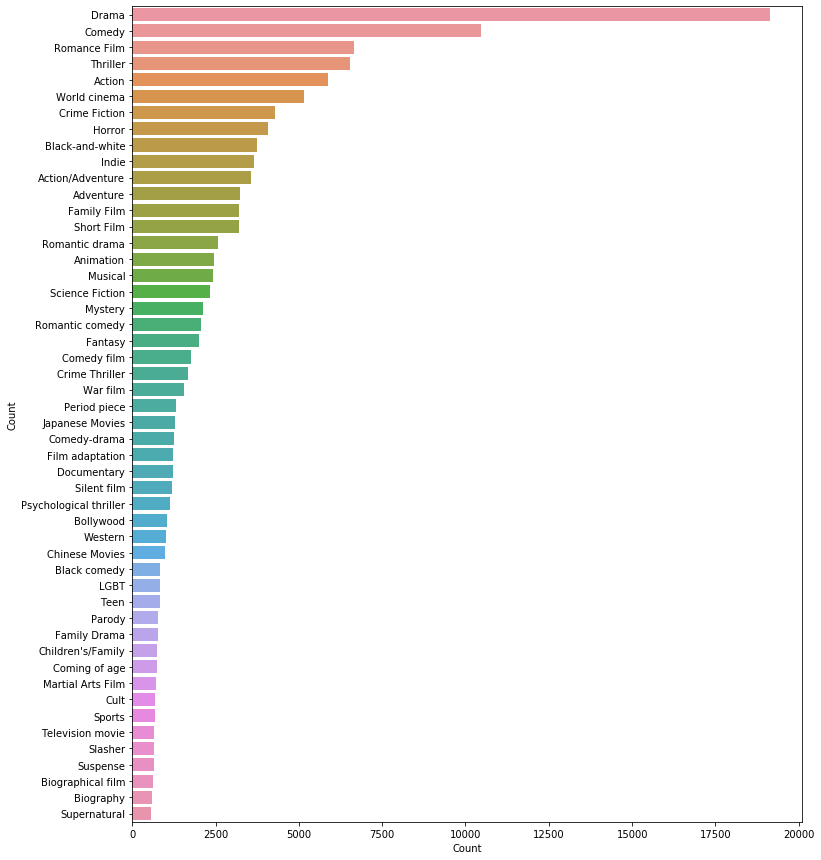

In [0]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

**Data Cleaning**

In [0]:
def clean_text(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ", text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [0]:
movies_new['clean_plot'] = movies_new['plot'].apply(lambda x: clean_text(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Visualizing Most Frequent Words

In [0]:
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    d = words_df.nlargest(columns="count", n=terms)
    
    plt.figure(figsize=(12,15))
    ax = sns.barplot(data=d, x="count", y="word")
    ax.set(ylabel='Word')
    plt.show()

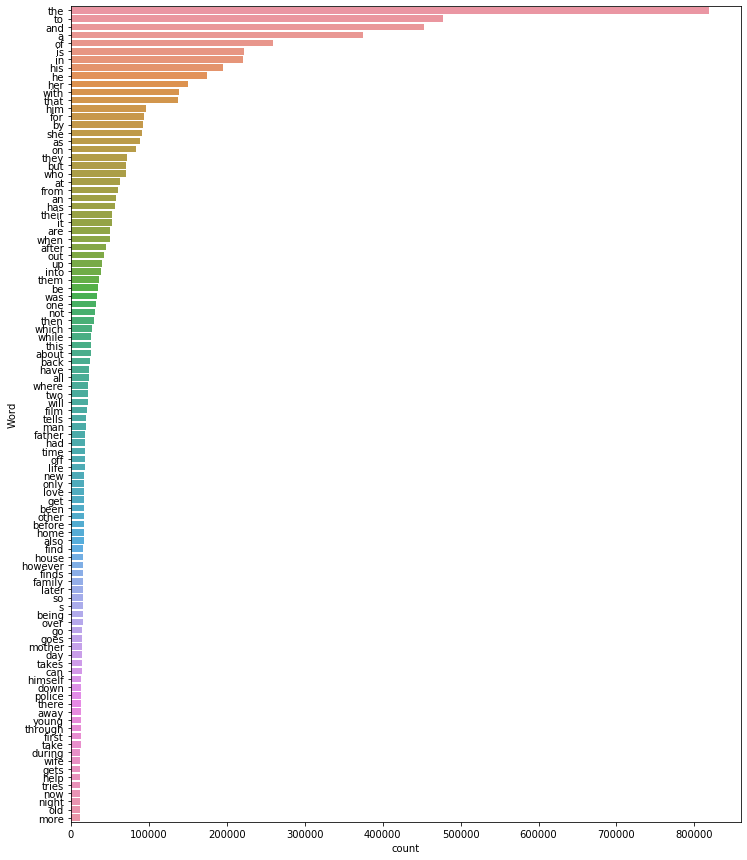

In [0]:
freq_words(movies_new['clean_plot'], 100)

In [0]:
#Removing Stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  no_stopword_text = [w for w in text.split() if not w in stop_words]
  return ' '.join(no_stopword_text)

In [0]:
movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


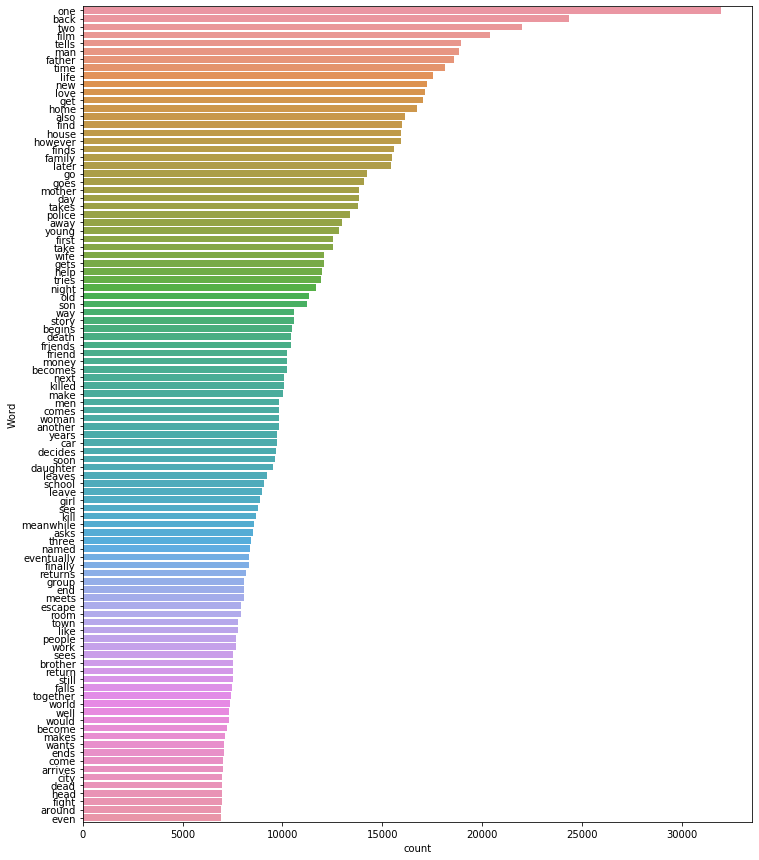

In [0]:
#After Stopwords Removal

freq_words(movies_new['clean_plot'], 100)

# Extracting Features
we will treat this multi-label classification problem as a Binary Relevance problem. Hence, we will now one hot encode the target variable, i.e., genre_new by using sklearn’s MultiLabelBinarizer( ). Since there are 363 unique genre tags, there are going to be 363 new target variables.

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genre_new'])

y = multilabel_binarizer.transform(movies_new['genre_new'])

### TF-IDF
TF-IDF features are being used here, although other feature extraction methods like Bag-of-Words, Word2Vec, GloVe, ELMo can be used as well. Most frequent 10,000 words have been used as features.

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [0]:
### Train Test Split (80:20 split)

x_train, x_test, y_train, y_test = train_test_split(movies_new['clean_plot'], y, test_size=0.2, random_state=9)

In [0]:
#Creating TF-IDF Features

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

 **Genre Prediction Model** - Logistic Regression is used in this classification problem. We will also use the OneVsRestClassifier to solve this problem as Binary Relevance or one-vs-all problem.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

In [0]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [0]:
#Fitting model

clf.fit(x_train_tfidf, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 48 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 182 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 214 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 245 is present in all training examples.
  str(classes[c]))


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
#Making Predictions for Validation Set

y_pred = clf.predict(x_test_tfidf)

In [0]:
y_pred[3]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Converting Arrays into Tags** - We will use the *inverse_transform( )* function along with the *MultiLabelBinarizer( )* object to convert the predicted arrays into movie genre tags.

In [0]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Action', 'Drama')

 **Model Evaluation** - To evaluate our model’s overall performance, we need to take into consideration all the predictions and the entire target variable of the validation set.

In [0]:
f1_score(y_test, y_pred, average="micro")

0.3156683206302113

**Boosting the Model** 

In [0]:
y_pred_prob = clf.predict_proba(x_test_tfidf)

In [0]:
t = 0.3
y_pred_new = (y_pred_prob >= t).astype(int)

In [0]:
f1_score(y_test, y_pred_new, average='micro')

0.437668381092334

**For Future Predictions**

In [0]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [0]:
for i in range(5): 
  k = x_test.sample(1).index[0] 
  print("Movie: ", movies_new['movie_name'][k], "\nPredicted genre: ", infer_tags(x_test[k])), print("Actual genre: ",movies_new['genre_new'][k], "\n")

Movie:  The Doll Squad 
Predicted genre:  [('Action', 'Thriller')]
Actual genre:  ['Crime Fiction', 'Action/Adventure', 'Action', 'Thriller'] 

Movie:  Donald Gets Drafted 
Predicted genre:  [('Short Film',)]
Actual genre:  ['Short Film'] 

Movie:  Larry-Boy and the Fib from Outer Space! 
Predicted genre:  [('Animation', 'Comedy')]
Actual genre:  ['Short Film', 'Musical', "Children's", 'Animation'] 

Movie:  Super Sweet 16: The Movie 
Predicted genre:  [('Comedy',)]
Actual genre:  ['Comedy', 'Teen', 'Television movie'] 

Movie:  French Kiss 
Predicted genre:  [('Comedy', 'Romance Film')]
Actual genre:  ['Romantic comedy', 'Romance Film', 'Comedy'] 

